# Homework 2: U.S. Boundary Currents

Name: Eric Long

Date: 9/2/24

#### Overview
In class, we examined the general structure of ocean circulation on large scales and found that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [107]:
# import modules here
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `VVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [108]:
# read in the EVEL and VVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook
evel = xr.open_dataset('EVEL_2015_12.nc')
nvel = xr.open_dataset('NVEL_2015_12.nc')

In [109]:
# store the velocity components and longitude/latitude data
# into numpy arrays
u_vel = evel['EVEL'].isel(time=0, k=0).values 
v_vel = nvel['NVEL'].isel(time=0, k=0).values 
lon = evel['longitude'].values
lat = evel['latitude'].values

Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

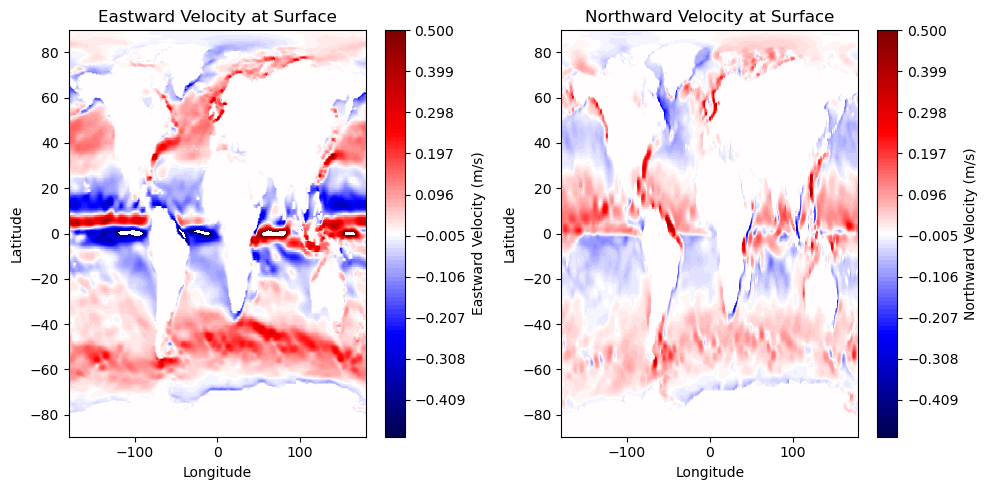

In [110]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1

# make a figure
fig = plt.figure(figsize=(10, 5))

# make a subplot for the eastward velocity at the surface
plt.subplot(1,2,1)
plt.contourf(lon, lat, u_vel, cmap='seismic', levels=np.linspace(-0.5, 0.5, 100))

plt.colorbar(label='Eastward Velocity (m/s)')
plt.title('Eastward Velocity at Surface')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# make a subplot for the northward velocity at the surface
plt.subplot(1,2,2)
plt.contourf(lon, lat, v_vel, cmap='seismic', levels=np.linspace(-0.5, 0.5, 100))
plt.colorbar(label='Northward Velocity (m/s)')
plt.title('Northward Velocity at Surface')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()

### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east cost of the U.S.? the west coast?
    - 45$^{\circ}$N on the east cost of the U.S.? the west coast?
2. Which current flows faster? East coast or west coast?
2. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.

# change this cell to a markdown and input your response here
1.
30N on the east cost of US.: northward
30N on the west cost of U.S.: southward
45N on the east cost of U.S.: eastward
45N on the east cost of U.S.: northward

2. 
The gulf stream on the east coast of the U.S is faster.

3.
The gulf stream is part of the north alantic gyre. The gulf stream brings warm water from the equator up and goes along the 
east coast where it turns eastward across the north atlantic to help with the clockwise circulation of the gyre.

The california current is part of the north pacific gyre. This current carries cold water from north down the west coast to
help with the counterclockwise circulation of the gyre. 



### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [112]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook
theta = xr.open_dataset('THETA_2015_12.nc')

In [113]:
# store the THETA grid into a into numpy array
temp_surface = theta['THETA'].isel(time=0, k=0).values
lon = theta['longitude'].values
lat = theta['latitude'].values

Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

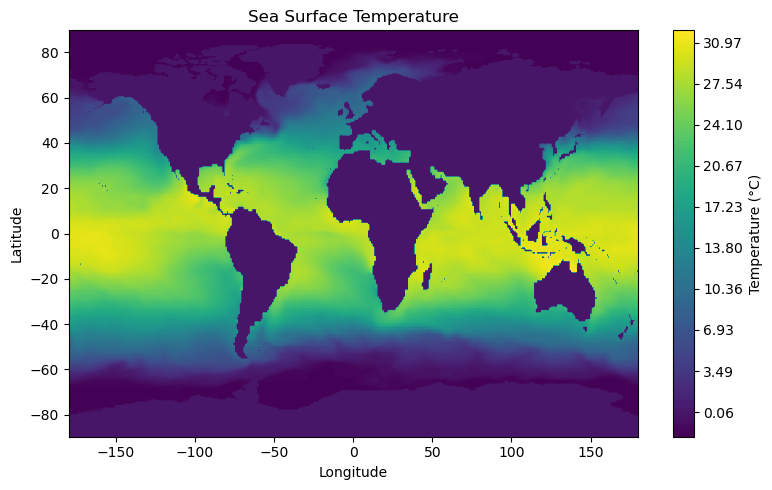

In [114]:
# make a plot of the temperature
# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data

# make a figure
fig = plt.figure(figsize=(8,5))

# plot the data
plt.contourf(lon, lat, temp_surface, cmap='viridis', levels=np.linspace(-2, 32, 100))
plt.colorbar(label='Temperature (°C)')
plt.title('Sea Surface Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()


### Questions:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?
2. How might ocean currents contribute to this temperature regime?

# change this cell to a markdown and input your response here

1.
the temperature on the west coast of the U.S is cooler than the east coast at the same latitude 
because of california current and the east coast is warmer because of the gulf stream. 

2.
The california current brings in cold water from the north to the west and the
gulf stream brings warm water from the tropics up the east coast.



### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [116]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook
wvelstar = xr.open_dataset('WVELSTAR_2015_12.nc')

In [117]:
# store the WVELSTAR grid into a into numpy array
vertical_velocity = wvelstar['WVELSTAR'].isel(time=0).values

Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.

In [118]:
# read in the depth variable to a numpy array
# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?
depth = wvelstar['Zl'].values
theta = xr.open_dataset('THETA_2015_12.nc')
temperature = theta['THETA'].isel(time=0).values
latitude_index = 259

Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40$^{\circ}$N i.e. index 259 along the latitude axis.

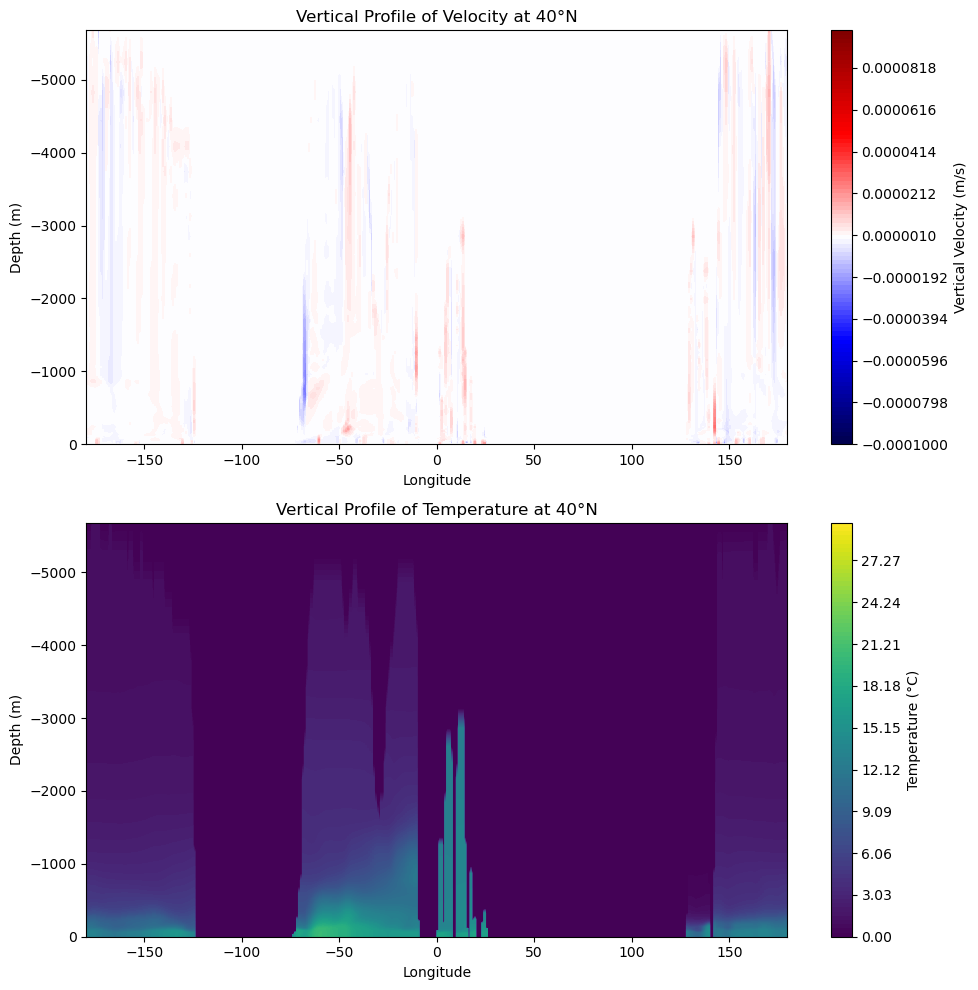

In [119]:
# make a figure
fig = plt.figure(figsize=(10,10))

# make subplot the vertical velocity
# use a divergent colorbar
# you will need to adjust the color bounds appropriately for this data
# try a few values and see what works
plt.subplot(2,1,1)
plt.contourf(lon, depth, vertical_velocity[:, latitude_index, :], cmap='seismic', levels=np.linspace(-0.0001, 0.0001, 100))
plt.colorbar(label='Vertical Velocity (m/s)')
plt.title('Vertical Profile of Velocity at 40°N')
plt.xlabel('Longitude')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()


# make a subplot of the vertical profile of temperature
plt.subplot(2,1,2)
plt.contourf(lon, depth, temperature[:, latitude_index, :], cmap='viridis', levels=np.linspace(0, 30, 100))
plt.colorbar(label='Temperature (°C)')
plt.title('Vertical Profile of Temperature at 40°N')
plt.xlabel('Longitude')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()  

plt.tight_layout()
plt.show()


### Questions:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?

# change this cell to a markdown and input your response here

1. 
The west coast vertical velocity is more upwards because of upwelling.

The east coast vertical velocity is weaker and there is less upwelling, it can be downwards in some areas.

2.
Vertical velocity is slower than horizontal velocity because vertial motions are constrained by the stratification of the ocean which resists vertical mixing.

Horizontal velocity have additional forces like wind and the coriolis effect which make them faster compared to
vertical velocities.

3.
The vertial currents adjacent to the coastline contrubute to the difference in surface temperture depening
on the coast. In the west coast, upwelling of cold water leads to lower sea surface temperatures. In the east coast, there are weaker vertical currents and downwelling contributes to warmer sea surfece temperatures.

4.
These winds contribute to the vertical velocity identified in question 1 by creating southward winds along the west coast which cause coastal upwelling. This leads to increased upward vertical velocity because deep water is rising to the surface. 
